# 1. Menyambungkan dengan penyimpanan Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# 2. Mengimpor pustaka/modul python yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import pickle
import re
import string

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.io as pio
pio.renderers.default = 'colab'
from wordcloud import WordCloud,STOPWORDS

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

import tensorflow as tf
from tensorflow import keras
from keras import layers

# 3. Data Understanding

## 3.1 Menampilkan Dataset

In [ ]:
### Menyiapkan path dataset pada penyimpanan drive dan menampilkan overview dataset book menggunakan library pandas

In [ ]:
book_meta_data = pd.read_csv('/content/drive/MyDrive/Thesis Project/books_dataset.csv')
book_meta_data

,Unnamed: 0,book_index,authors,original_title,image_url,average_rating,genre
0,0,0,Suzanne Collins,The Hunger Games,https://images.gr-assets.com/books/1447303603l...,4.34,"fiction, fantasy"
1,1,1,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,https://images.gr-assets.com/books/1474154022l...,4.44,"fantasy, fiction"
2,2,2,Stephenie Meyer,Twilight,https://images.gr-assets.com/books/1361039443l...,3.57,"fantasy, fiction"
3,3,3,Harper Lee,To Kill a Mockingbird,https://images.gr-assets.com/books/1361975680l...,4.25,"classics, fiction"
4,4,4,F. Scott Fitzgerald,The Great Gatsby,https://images.gr-assets.com/books/1490528560l...,3.89,"classics, fiction"
...,...,...,...,...,...,...,...
4995,4995,4995,Aprilynne Pike,Illusions,https://images.gr-assets.com/books/1324797814l...,4.12,"fantasy, romance"
4996,4996,4996,Joe McGinniss,Fatal Vision,https://i.gr-assets.com/images/S/compressed.ph...,4.10,"nonfiction, crime"
4997,4997,4997,Sudhir Venkatesh,Gang Leader for a Day,https://i.gr-assets.com/images/S/compressed.ph...,4.01,"nonfiction, memoir"
4998,4998,4998,"Raymond E. Feist, Michael Avon Oeming, Bryan J...","Magician: Apprentice (The Riftwar Saga, #1)",https://i.gr-assets.com/images/S/compressed.ph...,4.44,"fantasy, fiction"


In [ ]:
# Menghapus kolom yang tidak diperlukan
book_meta_data= book_meta_data.drop(['Unnamed: 0'], axis=1)
book_meta_data

,book_index,authors,original_title,image_url,average_rating,genre
0,0,Suzanne Collins,The Hunger Games,https://images.gr-assets.com/books/1447303603l...,4.34,"fiction, fantasy"
1,1,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,https://images.gr-assets.com/books/1474154022l...,4.44,"fantasy, fiction"
2,2,Stephenie Meyer,Twilight,https://images.gr-assets.com/books/1361039443l...,3.57,"fantasy, fiction"
3,3,Harper Lee,To Kill a Mockingbird,https://images.gr-assets.com/books/1361975680l...,4.25,"classics, fiction"
4,4,F. Scott Fitzgerald,The Great Gatsby,https://images.gr-assets.com/books/1490528560l...,3.89,"classics, fiction"
...,...,...,...,...,...,...
4995,4995,Aprilynne Pike,Illusions,https://images.gr-assets.com/books/1324797814l...,4.12,"fantasy, romance"
4996,4996,Joe McGinniss,Fatal Vision,https://i.gr-assets.com/images/S/compressed.ph...,4.10,"nonfiction, crime"
4997,4997,Sudhir Venkatesh,Gang Leader for a Day,https://i.gr-assets.com/images/S/compressed.ph...,4.01,"nonfiction, memoir"
4998,4998,"Raymond E. Feist, Michael Avon Oeming, Bryan J...","Magician: Apprentice (The Riftwar Saga, #1)",https://i.gr-assets.com/images/S/compressed.ph...,4.44,"fantasy, fiction"


In [ ]:
from google.colab import files
book_meta_data.to_csv('book_meta_data.csv', encoding = 'utf-8-sig')
files.download('book_meta_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 3.2 Menampilkan Jumlah Dataset

In [ ]:
### Menampilkan keterangan jumlah/panjang data unique daftar buku dan data pengguna/user

In [ ]:
print('Banyak Data Buku : ', len(book_meta_data.book_index.unique()))

Banyak Data Buku :  5000


## 3.3 Menampilkan Daftar Genre Buku

In [ ]:
print('Banyak genre: ', len(book_meta_data.genre.unique()))
print ('')
print('Jenis-jenis genre: ', book_meta_data.genre.unique())

Banyak genre:  277

Jenis-jenis genre:  ['fiction, fantasy' 'fantasy, fiction' 'classics, fiction'
 'fiction, romance' 'fantasy, classics' 'fiction, mystery'
 'fiction, contemporary' 'classics, history' 'fantasy, romance'
 'fiction, thriller' 'mystery, crime' 'romance, fiction'
 'fiction, classics' 'memoir, travel' 'fiction, ebooks' 'poetry, classics'
 'paranormal, romance' 'fantasy, contemporary' 'mystery, fiction'
 'fiction, paranormal' 'fantasy, philosophy' 'memoir, nonfiction'
 'nonfiction, biography' 'contemporary, fiction' 'ebooks, contemporary'
 'nonfiction, science' 'classics, horror' 'fiction, horror'
 'fiction, nonfiction' 'nonfiction, business' 'biography, business'
 'fiction, christian' 'fantasy, paranormal' 'romance, fantasy'
 'romance, history' 'science, thriller' 'fiction, history'
 'history, biography' 'romance, contemporary' 'fiction, art'
 'history, fiction' 'fiction, poetry' 'horror, fiction'
 'fiction, philosophy' 'memoir, biography' 'classics, nonfiction'
 'nonfict

## 3.4 Menampilkan Info Tipe Data

In [ ]:
# Memuat informasi dataframe
book_meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   book_index      5000 non-null   int64  
 1   authors         5000 non-null   object 
 2   original_title  5000 non-null   object 
 3   image_url       5000 non-null   object 
 4   average_rating  5000 non-null   float64
 5   genre           5000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 234.5+ KB


## 3.5 Menampilkan Data Null dan Data Duplicate

In [ ]:
# Menghitung jumlah data kosong pada setiap kolom
book_meta_data.isnull().sum()

book_index        0
authors           0
original_title    0
image_url         0
average_rating    0
genre             0
dtype: int64

In [ ]:
# Menghitung jumlah data duplicate
book_meta_data.duplicated().sum()

0

# 4. Data Preparation

## 4.1 Penggabungan Atribut Tags

In [ ]:
book_meta_data["tags"]= book_meta_data["genre"]+" "+book_meta_data['authors']+" "+book_meta_data['original_title']
book_meta_data

,book_index,authors,original_title,image_url,average_rating,genre,tags
0,0,Suzanne Collins,The Hunger Games,https://images.gr-assets.com/books/1447303603l...,4.34,"fiction, fantasy","fiction, fantasy Suzanne Collins The Hunger Games"
1,1,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,https://images.gr-assets.com/books/1474154022l...,4.44,"fantasy, fiction","fantasy, fiction J.K. Rowling, Mary GrandPré H..."
2,2,Stephenie Meyer,Twilight,https://images.gr-assets.com/books/1361039443l...,3.57,"fantasy, fiction","fantasy, fiction Stephenie Meyer Twilight"
3,3,Harper Lee,To Kill a Mockingbird,https://images.gr-assets.com/books/1361975680l...,4.25,"classics, fiction","classics, fiction Harper Lee To Kill a Mocking..."
4,4,F. Scott Fitzgerald,The Great Gatsby,https://images.gr-assets.com/books/1490528560l...,3.89,"classics, fiction","classics, fiction F. Scott Fitzgerald The Grea..."
...,...,...,...,...,...,...,...
4995,4995,Aprilynne Pike,Illusions,https://images.gr-assets.com/books/1324797814l...,4.12,"fantasy, romance","fantasy, romance Aprilynne Pike Illusions"
4996,4996,Joe McGinniss,Fatal Vision,https://i.gr-assets.com/images/S/compressed.ph...,4.10,"nonfiction, crime","nonfiction, crime Joe McGinniss Fatal Vision"
4997,4997,Sudhir Venkatesh,Gang Leader for a Day,https://i.gr-assets.com/images/S/compressed.ph...,4.01,"nonfiction, memoir","nonfiction, memoir Sudhir Venkatesh Gang Leade..."
4998,4998,"Raymond E. Feist, Michael Avon Oeming, Bryan J...","Magician: Apprentice (The Riftwar Saga, #1)",https://i.gr-assets.com/images/S/compressed.ph...,4.44,"fantasy, fiction","fantasy, fiction Raymond E. Feist, Michael Avo..."


## 4.2 Mengubah Tipe Data

In [ ]:
## change coloumn average rating from float to string
book_meta_data['average_rating'] = book_meta_data['average_rating'].astype(float)
book_meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   book_index      5000 non-null   int64  
 1   authors         5000 non-null   object 
 2   original_title  5000 non-null   object 
 3   image_url       5000 non-null   object 
 4   average_rating  5000 non-null   float64
 5   genre           5000 non-null   object 
 6   tags            5000 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 273.6+ KB


## 4.3 Menampilkan kata yang sering atau paling banyak muncul pada kolom auhors dan genre

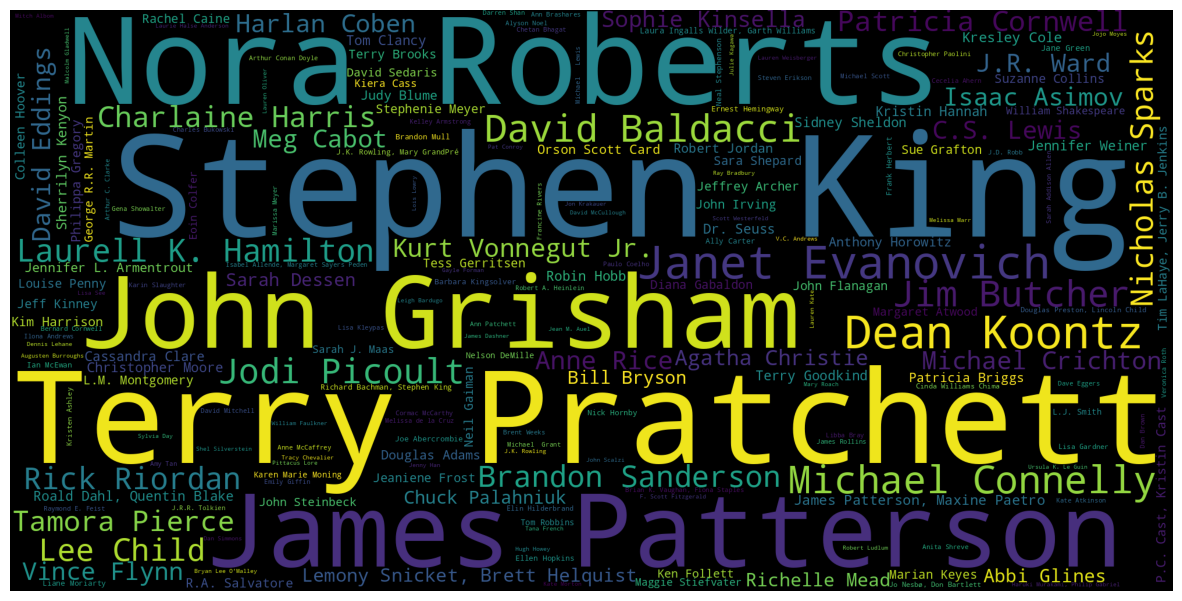

In [ ]:
# Menampilkan jumlah kata paling banyak yg muncul dalam kolom authors
word_could_dict = Counter(book_meta_data['authors'].tolist())
wordcloud = WordCloud(width = 2000, height = 1000).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

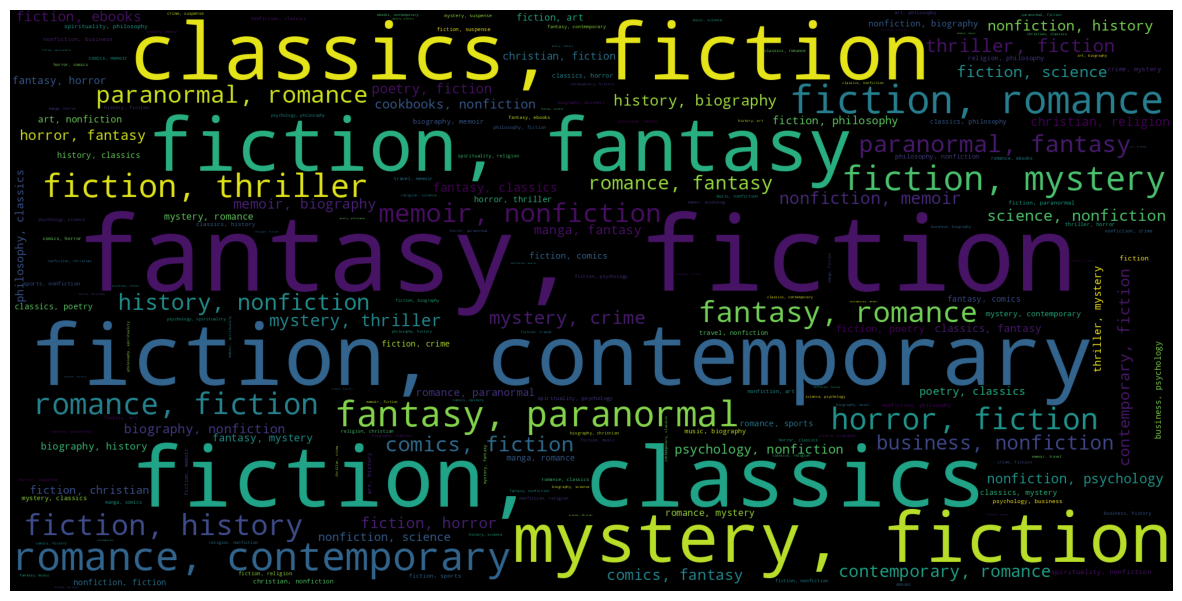

In [ ]:
# Menampilkan jumlah kata paling banyak yg muncul dalam kolom genre
word_could_dict = Counter(book_meta_data['genre'].tolist())
wordcloud = WordCloud(width = 2000, height = 1000).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 4.4 Mendeklarasikan Variable Baru

In [ ]:
# Memuat dataset ke dalam variable baru
book = book_meta_data.book_index.unique()

# Mengurutkan data dan menghapus data yang sama
book = np.sort(np.unique(book))

print('Jumlah seluruh data book berdasarkan index: ', len(book))

Jumlah seluruh data book berdasarkan index:  5000


In [ ]:
book_data = pd.concat([book_meta_data])
book_data

,book_index,authors,original_title,image_url,average_rating,genre,tags
0,0,Suzanne Collins,The Hunger Games,https://images.gr-assets.com/books/1447303603l...,4.34,"fiction, fantasy","fiction, fantasy Suzanne Collins The Hunger Games"
1,1,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,https://images.gr-assets.com/books/1474154022l...,4.44,"fantasy, fiction","fantasy, fiction J.K. Rowling, Mary GrandPré H..."
2,2,Stephenie Meyer,Twilight,https://images.gr-assets.com/books/1361039443l...,3.57,"fantasy, fiction","fantasy, fiction Stephenie Meyer Twilight"
3,3,Harper Lee,To Kill a Mockingbird,https://images.gr-assets.com/books/1361975680l...,4.25,"classics, fiction","classics, fiction Harper Lee To Kill a Mocking..."
4,4,F. Scott Fitzgerald,The Great Gatsby,https://images.gr-assets.com/books/1490528560l...,3.89,"classics, fiction","classics, fiction F. Scott Fitzgerald The Grea..."
...,...,...,...,...,...,...,...
4995,4995,Aprilynne Pike,Illusions,https://images.gr-assets.com/books/1324797814l...,4.12,"fantasy, romance","fantasy, romance Aprilynne Pike Illusions"
4996,4996,Joe McGinniss,Fatal Vision,https://i.gr-assets.com/images/S/compressed.ph...,4.10,"nonfiction, crime","nonfiction, crime Joe McGinniss Fatal Vision"
4997,4997,Sudhir Venkatesh,Gang Leader for a Day,https://i.gr-assets.com/images/S/compressed.ph...,4.01,"nonfiction, memoir","nonfiction, memoir Sudhir Venkatesh Gang Leade..."
4998,4998,"Raymond E. Feist, Michael Avon Oeming, Bryan J...","Magician: Apprentice (The Riftwar Saga, #1)",https://i.gr-assets.com/images/S/compressed.ph...,4.44,"fantasy, fiction","fantasy, fiction Raymond E. Feist, Michael Avo..."


## 4.5 Memilih kolom berdasarkan data yang dibutuhkan untuk melakukan content based learning berdasarkan genre yaitu judul dan genre

In [ ]:
title_book = book_meta_data['original_title'].tolist()
tags_book = book_meta_data['tags'].tolist()

print(len(title_book))
print(len(tags_book))

5000
5000


## 4.6 Membuat data menjadi dalam bentuk dataframe sehingga mudah untuk dipersiapkan

In [ ]:
data = pd.DataFrame({
    'title': title_book,
    'tags': tags_book
})

data

,title,tags
0,The Hunger Games,"fiction, fantasy Suzanne Collins The Hunger Games"
1,Harry Potter and the Philosopher's Stone,"fantasy, fiction J.K. Rowling, Mary GrandPré H..."
2,Twilight,"fantasy, fiction Stephenie Meyer Twilight"
3,To Kill a Mockingbird,"classics, fiction Harper Lee To Kill a Mocking..."
4,The Great Gatsby,"classics, fiction F. Scott Fitzgerald The Grea..."
...,...,...
4995,Illusions,"fantasy, romance Aprilynne Pike Illusions"
4996,Fatal Vision,"nonfiction, crime Joe McGinniss Fatal Vision"
4997,Gang Leader for a Day,"nonfiction, memoir Sudhir Venkatesh Gang Leade..."
4998,"Magician: Apprentice (The Riftwar Saga, #1)","fantasy, fiction Raymond E. Feist, Michael Avo..."


In [ ]:
# melihat informasi kolom pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5000 non-null   object
 1   tags    5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


## 4.7 Memuat banyak data dari setiap unique value berdasarkan tags

In [ ]:
value_tags = pd.DataFrame(data['tags'].value_counts().reset_index().values, columns = ['tags', 'count'])
print(len(value_tags))
pd.options.display.max_colwidth = 500
value_tags

5000


,tags,count
0,"fiction, fantasy Suzanne Collins The Hunger Games",1
1,"classics, fiction Pierre-Ambroise Choderlos de Laclos, Douglas Parmée Les Liaisons dangereuses",1
2,"mystery, fiction Michael Connelly The Black Box",1
3,"mystery, fiction Gilly Macmillan What She Knew (Burnt Paper Sky)",1
4,"fiction, classics Irwin Shaw Rich Man, Poor Man",1
...,...,...
4995,"fiction, romance Sarah Waters The Paying Guests",1
4996,"fiction, classics Louise Fitzhugh Harriet the Spy",1
4997,"fiction, fantasy Edgar Allan Poe, Stephen Marlowe The Fall of the House of Usher and Other Writings",1
4998,"business, psychology Robert B. Cialdini Influence: The Psychology of Persuasion",1


In [ ]:
# membuat data string tanda strip '-' pada variable data dihapus
data = data[data.tags != '-']

In [ ]:
data = data.drop_duplicates('title')
len(data)

5000

## 4.8 Melakukan indeks ulang pada data agar penomoran dilakukan berurutan

In [ ]:
data.reset_index()
data

,title,tags
0,The Hunger Games,"fiction, fantasy Suzanne Collins The Hunger Games"
1,Harry Potter and the Philosopher's Stone,"fantasy, fiction J.K. Rowling, Mary GrandPré Harry Potter and the Philosopher's Stone"
2,Twilight,"fantasy, fiction Stephenie Meyer Twilight"
3,To Kill a Mockingbird,"classics, fiction Harper Lee To Kill a Mockingbird"
4,The Great Gatsby,"classics, fiction F. Scott Fitzgerald The Great Gatsby"
...,...,...
4995,Illusions,"fantasy, romance Aprilynne Pike Illusions"
4996,Fatal Vision,"nonfiction, crime Joe McGinniss Fatal Vision"
4997,Gang Leader for a Day,"nonfiction, memoir Sudhir Venkatesh Gang Leader for a Day"
4998,"Magician: Apprentice (The Riftwar Saga, #1)","fantasy, fiction Raymond E. Feist, Michael Avon Oeming, Bryan J.L. Glass, Ryan Stegman Magician: Apprentice (The Riftwar Saga, #1)"


## 4.19 Memasukkan nilai data masing-masing kolom ke dalam variabel baru

In [ ]:
title = data['title'].tolist()
tags = data['tags'].tolist()

print(len(title))
print(len(tags))

5000
5000


In [ ]:
# mengecek ulang data yg dimasukkan ke dalam variable baru
data = pd.DataFrame({
    'title': title,
    'tags': tags
})
data

,title,tags
0,The Hunger Games,"fiction, fantasy Suzanne Collins The Hunger Games"
1,Harry Potter and the Philosopher's Stone,"fantasy, fiction J.K. Rowling, Mary GrandPré Harry Potter and the Philosopher's Stone"
2,Twilight,"fantasy, fiction Stephenie Meyer Twilight"
3,To Kill a Mockingbird,"classics, fiction Harper Lee To Kill a Mockingbird"
4,The Great Gatsby,"classics, fiction F. Scott Fitzgerald The Great Gatsby"
...,...,...
4995,Illusions,"fantasy, romance Aprilynne Pike Illusions"
4996,Fatal Vision,"nonfiction, crime Joe McGinniss Fatal Vision"
4997,Gang Leader for a Day,"nonfiction, memoir Sudhir Venkatesh Gang Leader for a Day"
4998,"Magician: Apprentice (The Riftwar Saga, #1)","fantasy, fiction Raymond E. Feist, Michael Avon Oeming, Bryan J.L. Glass, Ryan Stegman Magician: Apprentice (The Riftwar Saga, #1)"


# 5. Modelling

## 5.1 TF-IDF (Term Frequency - Inverse Document Frequency)

### 5.1.1 Membangun sistem rekomendasi berdasarkan tags yang ada pada setiap Buku

In [ ]:
# Inisialisasi CountVectorizer
tf = CountVectorizer()

# Melakukan perhitungan idf pada data genre
tf.fit(tags)

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['000', '01', '10', ..., '高校デビュー', '黒執事', '채식주의자'], dtype=object)

### 5.1.2 Melakukan Proses fit dan melihat jumlah ukuran matrix

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(tags)

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(5000, 9419)

### 5.1.3 Mengubah vektor ke dalam bentuk matrix

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

### 5.1.4 Melihat Daftar jumlah buku berdasarkan tags dan melihat korelasi nya yang diperlihatkan dalam bentuk matrix

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.title
).sample(22, axis=1).sample(10, axis=0)

,caleb,времени,labyrinths,plot,ephron,exercises,class,hogfather,keymer,hisaya,...,nichts,1963,mcclellan,isaac,homo,lovin,ham,levi,weis,this
title,,,,,,,,,,,,,,,,,,,,,
The Emperor of All Maladies: A Biography of Cancer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Physick Book of Deliverance Dane,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Conversations with God, An Uncommon Dialogue: Living in the World with Honesty, Courage, and Love, Book 1",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Fires of Heaven,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lost Lake,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Agnes Grey,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
No Exit and Three Other Plays,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Executive Power,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bloodfever,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 5.2 Cosine Similarity

### 5.2.1 Melatih Model dengan cosine similarity

In [ ]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.34188173, 0.3380617 , ..., 0.        , 0.28347335,
        0.12598816],
       [0.34188173, 1.        , 0.26967994, ..., 0.        , 0.22613351,
        0.10050378],
       [0.3380617 , 0.26967994, 1.        , ..., 0.        , 0.2236068 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.11785113],
       [0.28347335, 0.22613351, 0.2236068 , ..., 0.        , 1.        ,
        0.08333333],
       [0.12598816, 0.10050378, 0.        , ..., 0.11785113, 0.08333333,
        1.        ]])

### 5.2.2 tahap ini menampilkan matriks kesamaan setiap judul dengan menampilkan judul buku dalam 10 sampel kolom (axis = 1) dan 10 sampel baris (axis=0).

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=title)
print('Shape:', cosine_sim_df.shape)


cosine_sim_df.sample(12, axis=1).sample(12, axis=0)

Shape: (5000, 5000)


,Frog and Toad Are Friends,Wool,South of Broad,Out of the Dust,A Red Herring Without Mustard,The Death and Life of Charlie St. Cloud,"Wheat Belly: Lose the Wheat, Lose the Weight, and Find Your Path Back to Health",A Briefer History of Time,The House at Pooh Corner,Beautiful Oblivion,"The Clique (The Clique, #1)",Across the Universe
title,,,,,,,,,,,,
Angle of Repose,0.251976,0.169031,0.285714,0.267261,0.133631,0.218218,0.000000,0.119523,0.239046,0.154303,0.109109,0.000000
Bleachers,0.149071,0.200000,0.169031,0.158114,0.158114,0.129099,0.000000,0.000000,0.141421,0.182574,0.129099,0.000000
Only the Good Spy Young,0.000000,0.000000,0.000000,0.117851,0.117851,0.192450,0.133333,0.000000,0.105409,0.136083,0.192450,0.251976
Amsterdam,0.149071,0.200000,0.338062,0.158114,0.158114,0.129099,0.000000,0.000000,0.141421,0.182574,0.258199,0.000000
Redeployment,0.149071,0.200000,0.338062,0.158114,0.158114,0.129099,0.000000,0.000000,0.141421,0.182574,0.258199,0.000000
"I'd Tell You I Love You, But Then I'd Have to Kill You",0.000000,0.000000,0.000000,0.000000,0.079057,0.064550,0.044721,0.000000,0.000000,0.091287,0.000000,0.084515
Travels with Charley: In Search of America,0.100504,0.000000,0.113961,0.106600,0.000000,0.087039,0.000000,0.095346,0.095346,0.000000,0.000000,0.000000
Death of a Salesman,0.251976,0.169031,0.285714,0.267261,0.133631,0.327327,0.000000,0.119523,0.239046,0.154303,0.109109,0.000000
Queen of Shadows,0.000000,0.169031,0.142857,0.133631,0.000000,0.218218,0.000000,0.119523,0.000000,0.154303,0.000000,0.285714


### 5.2.3 Mengekspor file pickle pada similarity

In [ ]:
## creating a new dataframe with tags ,title and image_url
new_df=book_meta_data[["original_title","authors","tags","image_url","average_rating"]]
new_df.head(11)

,original_title,authors,tags,image_url,average_rating
0,The Hunger Games,Suzanne Collins,"fiction, fantasy Suzanne Collins The Hunger Games",https://images.gr-assets.com/books/1447303603l/2767052.jpg,4.34
1,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPré","fantasy, fiction J.K. Rowling, Mary GrandPré Harry Potter and the Philosopher's Stone",https://images.gr-assets.com/books/1474154022l/3.jpg,4.44
2,Twilight,Stephenie Meyer,"fantasy, fiction Stephenie Meyer Twilight",https://images.gr-assets.com/books/1361039443l/41865.jpg,3.57
3,To Kill a Mockingbird,Harper Lee,"classics, fiction Harper Lee To Kill a Mockingbird",https://images.gr-assets.com/books/1361975680l/2657.jpg,4.25
4,The Great Gatsby,F. Scott Fitzgerald,"classics, fiction F. Scott Fitzgerald The Great Gatsby",https://images.gr-assets.com/books/1490528560l/4671.jpg,3.89
5,The Fault in Our Stars,John Green,"fiction, romance John Green The Fault in Our Stars",https://images.gr-assets.com/books/1360206420l/11870085.jpg,4.26
6,The Hobbit or There and Back Again,J.R.R. Tolkien,"fantasy, classics J.R.R. Tolkien The Hobbit or There and Back Again",https://images.gr-assets.com/books/1372847500l/5907.jpg,4.25
7,The Catcher in the Rye,J.D. Salinger,"classics, fiction J.D. Salinger The Catcher in the Rye",https://images.gr-assets.com/books/1398034300l/5107.jpg,3.79
8,Angels & Demons,Dan Brown,"fiction, mystery Dan Brown Angels & Demons",https://images.gr-assets.com/books/1303390735l/960.jpg,3.85
9,Pride and Prejudice,Jane Austen,"classics, fiction Jane Austen Pride and Prejudice",https://images.gr-assets.com/books/1320399351l/1885.jpg,4.24


In [ ]:
## creating pickle file for both similarity and dataframe
pickle.dump(cosine_sim,open('similarity.pkl','wb'))
pickle.dump(new_df,open('book_list.pkl','wb'))

# 6. Evaluasi Model

## 6.1 Pada tahap ini dilakukan indikasi dan diperlihatkan judul buku berdasarkan urutan dari data

In [ ]:
indices = pd.Series(index = data['title'], data = data.index).drop_duplicates()
indices.head()

title
The Hunger Games                            0
Harry Potter and the Philosopher's Stone    1
Twilight                                    2
To Kill a Mockingbird                       3
The Great Gatsby                            4
dtype: int64

## 6.2 Membuat fungsi untuk memanggil 6 rekomendasi film berdasarkan judul yang di input

In [ ]:
def book_recommendations(title, cosine_sim = cosine_sim,items=data[['title','tags']]):
    # Mengambil indeks dari judul film yang telah didefinisikan sebelumnnya
    idx = indices[title]

    # Mengambil skor kemiripan dengan semua judul film
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Mengurutkan film berdasarkan skor kemiripan
    sim_scores = sorted(sim_scores, key = lambda x : x[1], reverse = True)

    # Mengambil 6 skor kemiripan dari 1-6 karena urutan 0 memberikan indeks yang sama dengan judul film yang diinput
    sim_scores = sim_scores[1:10]

    # Mengambil judul film dari skor kemiripan
    book_indices = [i[0] for i in sim_scores]

    scores = [score[1] for score in sim_scores]
    top_n_recommendation = book_meta_data[['original_title', 'authors', 'genre']].iloc[book_indices]
    top_n_recommendation['genre'] = top_n_recommendation['genre'].apply(lambda x: x.split())
    top_n_recommendation['score'] = scores
    return top_n_recommendation.iloc[1:]

    # Mengembalikan 6 rekomendasi judul film dari kemiripan skor yang telah diurutkan dan menampilkan genre dari 10 rekomendasi film tersebut
    return pd.DataFrame(data['title'][book_indices]).merge(items)

In [ ]:
test_title = book_meta_data['original_title'].values[0]
pd.set_option('display.max_colwidth', None)
test_df = book_meta_data[['original_title', 'authors', 'genre']].loc[book_meta_data['original_title'] == test_title]
test_df['genre'] = test_df['genre'].apply(lambda x: x.split())
test_df

,original_title,authors,genre
0,The Hunger Games,Suzanne Collins,"[fiction,, fantasy]"


In [ ]:
recommendation = book_recommendations(test_title)
recommendation.head(6)

,original_title,authors,genre,score
1495,Gregor the Overlander,Suzanne Collins,"[fantasy,, fiction]",0.714286
19,Mockingjay,Suzanne Collins,"[fiction,, fantasy]",0.676123
3065,Gregor and the Curse of the Warmbloods,Suzanne Collins,"[fantasy,, fiction]",0.628971
2836,Gregor and the Code of Claw,Suzanne Collins,"[fantasy,, fiction]",0.597614
3576,Gregor and the Prophecy of Bane,Suzanne Collins,"[fantasy,, fiction]",0.597614
4527,Gregor and the Marks of Secret,Suzanne Collins,"[fantasy,, fiction]",0.597614


## 6.3 Mencoba menampilkan 6 rekomendasi buku dari judul yang telah di input menggunakan fungsi book_recomendations dan menampilkan skor kemiripannya

In [ ]:
eval_title = 'Disgrace'
high_score = book_recommendations(eval_title)
high_score.head(9)

,original_title,authors,genre,score
2462,Push,Sapphire,"[fiction,, contemporary]",0.500000
4197,Stranger Than Fiction: True Stories,Chuck Palahniuk,"[fiction,, contemporary]",0.452267
113,Middlesex,Jeffrey Eugenides,"[fiction,, contemporary]",0.447214
122,Room,Emma Donoghue,"[fiction,, contemporary]",0.447214
474,Choke,Chuck Palahniuk,"[fiction,, contemporary]",0.447214
612,Midwives,Chris Bohjalian,"[fiction,, contemporary]",0.447214
640,Freedom,Jonathan Franzen,"[fiction,, contemporary]",0.447214
923,Wallbanger,Alice Clayton,"[contemporary,, fiction]",0.447214


## 6.4 Melakukan perhitungan dengan menggunakan metrik precision untuk melihat akurasi

In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Read genre data from CSV file
csv_file = "/content/drive/MyDrive/Thesis Project/books_dataset.csv"
df = pd.read_csv(csv_file)

# Extract items and genres from the DataFrame
authors = df['authors'].tolist()
genres = df['genre'].tolist()

# Use MultiLabelBinarizer to create the genre matrix
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(genres)

# Print the genre matrix
print(genre_matrix)


[[1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 1]
 ...
 [1 1 0 ... 0 0 0]
 [1 1 1 ... 0 0 1]
 [1 1 1 ... 1 0 0]]


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'genre' column into numerical labels
label_encoder = LabelEncoder()
book_meta_data['genre_encoded'] = label_encoder.fit_transform(book_meta_data['genre'])

In [ ]:
from sklearn.metrics import confusion_matrix

# Hitung cosine similarity atau tf-idf matrix
conf_matrix = cosine_similarity(tfidf_matrix)

# Tentukan threshold
threshold = 0.4

# Contoh label kebenaran sejati
y_true = (book_meta_data['genre_encoded'] >= threshold).astype(int)
y_pred = (conf_matrix.flatten() >= threshold).astype(int).flatten()  # label prediksi

#Pastikan y_pred memiliki jumlah elemen yang sama dengan y_true
y_pred = y_pred[:len(y_true)]

# Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Dapatkan nilai TP, TN, FP, FN dari confusion matrix
tn, fp, fn, tp = cm.ravel()

# Hitung precision
# tp, jumlah prediksi benar untuk tags yang mirip atau serupa
# fp, jumlah prediksi salah untuk tags yang mirip atau serupa
precision = tp / (tp + fp) * 100

print("Confusion Matrix:")
print(cm)
print("True Positives (TP):", tp)
print("False Positives (FP):", fp)
print("True Negatives (TN):", tn)
print("False Negatives (FN):", fn)
print("Precision:", "{:.0f}%".format(precision))

Confusion Matrix:
[[   2    0]
 [4760  238]]
True Positives (TP): 238
False Positives (FP): 0
True Negatives (TN): 2
False Negatives (FN): 4760
Precision: 100%


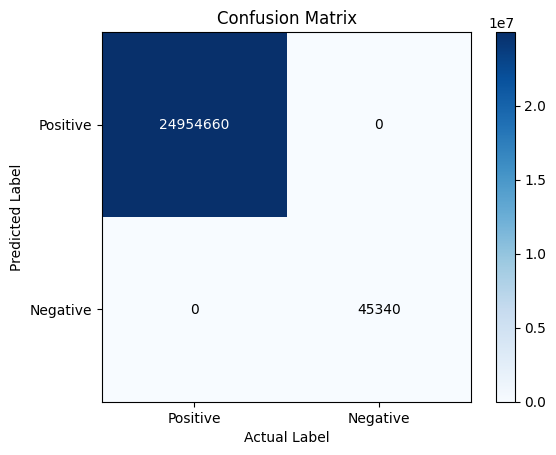

In [ ]:
# Example confusion matrix
conf_matrix = np.array([[24954660, 0], [0, 45340]])

# Define class labels
class_labels = ['Positive', 'Negative']

# Create confusion matrix plot
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add axis labels
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)
# Add numerical values to cells
thresh = conf_matrix.max() / 2
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'), ha='center', va='center',
             color='white' if conf_matrix[i, j] > thresh else 'black')

# Add axis labels
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')

# Display the plot
plt.show()